In [14]:
import numpy as np
import matplotlib.pyplot as plt
from env import Environment
from sagent import Agents
import os

In [15]:
def train_on_map(map_file, num_agents, n_packages, episodes, max_time_steps, 
                 alpha, alpha_decay, alpha_min, gamma, epsilon, epsilon_min, epsilon_decay_ep, seed):
    env = Environment(
        map_file=map_file,
        max_time_steps=max_time_steps,
        n_robots=num_agents,
        n_packages=n_packages,
        move_cost=-0.01,
        delivery_reward=10.0,
        delay_reward=1.0,
        seed=seed
    )
    
    agents = Agents(
        alpha=alpha,
        alpha_decay=alpha_decay,
        alpha_min=alpha_min,
        gamma=gamma,
        epsilon=epsilon,
        epsilon_min=epsilon_min
    )
    
    state = env.reset()
    agents.init_agents(state, move_cost=-0.01)
    
    total_rewards = []
    
    for episode in range(episodes):
        state = env.reset()
        done = False
        episode_reward = 0
        
        # Chọn hành động đầu tiên
        actions = agents.get_actions(state)
        
        while not done:
            # Thực hiện bước trong môi trường
            next_state, reward, done, infos = env.step(actions)
            
            # Chọn hành động tiếp theo (SARSA yêu cầu)
            next_actions = agents.get_actions(next_state)
            
            # Cập nhật agents
            agents.update_agents(actions, reward, next_state, next_actions)
            
            # Cộng dồn reward
            episode_reward += reward
            state = next_state
            actions = next_actions
        
        # Giảm epsilon và alpha sau mỗi episode
        agents.decay_epsilon_all(decay_rate=epsilon_decay_ep)
        agents.decay_alpha_all(decay_rate=alpha_decay)
        
        total_rewards.append(episode_reward)
        
        if (episode + 1) % 1000 == 0:
            print(f"Map {map_file}, Episode {episode + 1}/{episodes}, Total Reward: {episode_reward:.2f}")
    
    # Lưu Q-table
    save_folder = f"sarsa_q_tables_{map_file.split('.')[0]}"
    agents.save_all(save_folder)
    print(f"Saved SARSA Q-tables to {save_folder}")
    
    return total_rewards

In [16]:
params = {
    'num_agents': 5,
    'n_packages': 10,
    'episodes': 50000,
    'max_time_steps': 1000,
    'alpha': 0.1,
    'alpha_decay': 0.9995,
    'alpha_min': 0.001,
    'gamma': 0.95,
    'epsilon': 1.0,
    'epsilon_min': 0.05,
    'epsilon_decay_ep': 0.995,
    'seed': 10
}

# Danh sách các map
maps = ['map1.txt', 'map2.txt', 'map3.txt', 'map4.txt', 'map5.txt']



Training SARSA on map1.txt...
Map map1.txt, Episode 1000/50000, Total Reward: -1.20
Map map1.txt, Episode 2000/50000, Total Reward: -2.41
Map map1.txt, Episode 3000/50000, Total Reward: -1.67
Map map1.txt, Episode 4000/50000, Total Reward: 1.18
Map map1.txt, Episode 5000/50000, Total Reward: -1.48
Map map1.txt, Episode 6000/50000, Total Reward: -1.74
Map map1.txt, Episode 7000/50000, Total Reward: -1.61
Map map1.txt, Episode 8000/50000, Total Reward: -0.74
Map map1.txt, Episode 9000/50000, Total Reward: -1.63
Map map1.txt, Episode 10000/50000, Total Reward: -0.71
Map map1.txt, Episode 11000/50000, Total Reward: -1.80
Map map1.txt, Episode 12000/50000, Total Reward: -0.63
Map map1.txt, Episode 13000/50000, Total Reward: -1.48
Map map1.txt, Episode 14000/50000, Total Reward: -0.57
Map map1.txt, Episode 15000/50000, Total Reward: -1.66
Map map1.txt, Episode 16000/50000, Total Reward: -1.66
Map map1.txt, Episode 17000/50000, Total Reward: -1.71
Map map1.txt, Episode 18000/50000, Total Rew

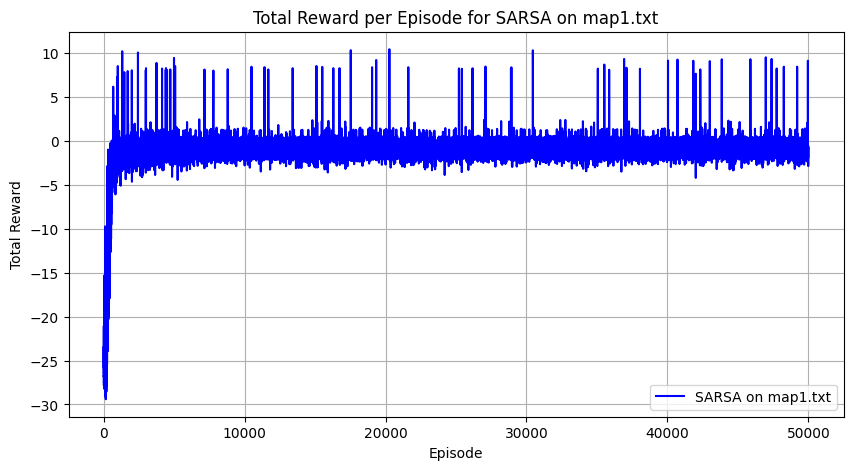

Saved SARSA rewards plot for map1.txt to sarsa_rewards_map1.png


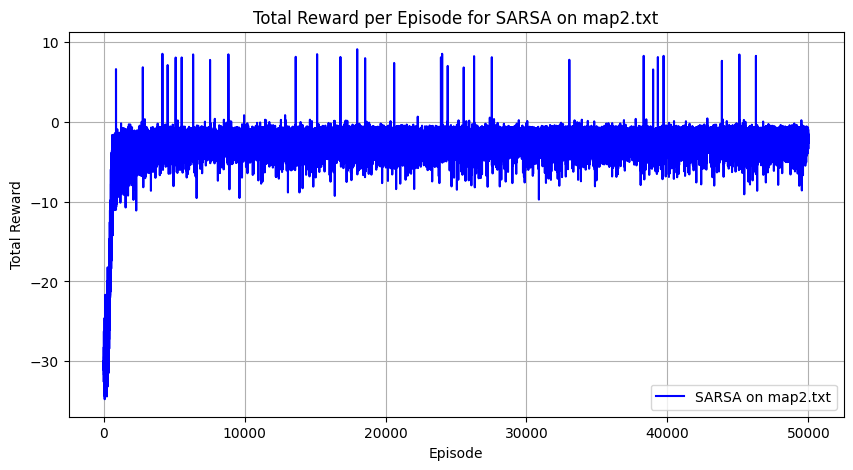

Saved SARSA rewards plot for map2.txt to sarsa_rewards_map2.png


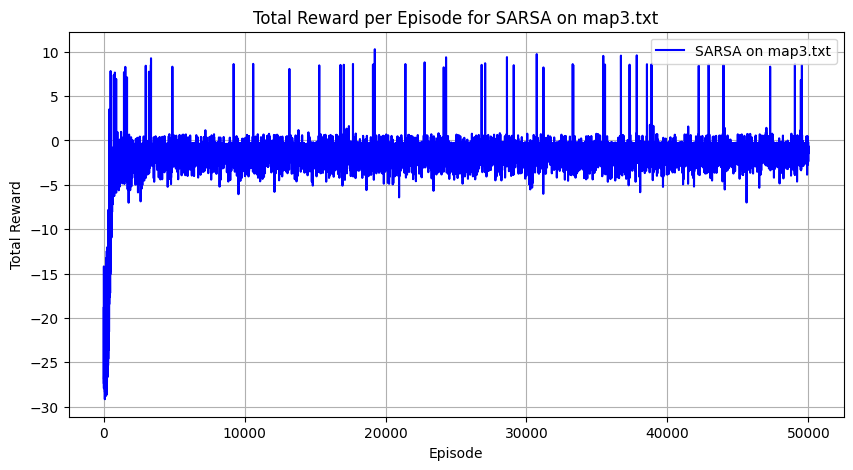

Saved SARSA rewards plot for map3.txt to sarsa_rewards_map3.png


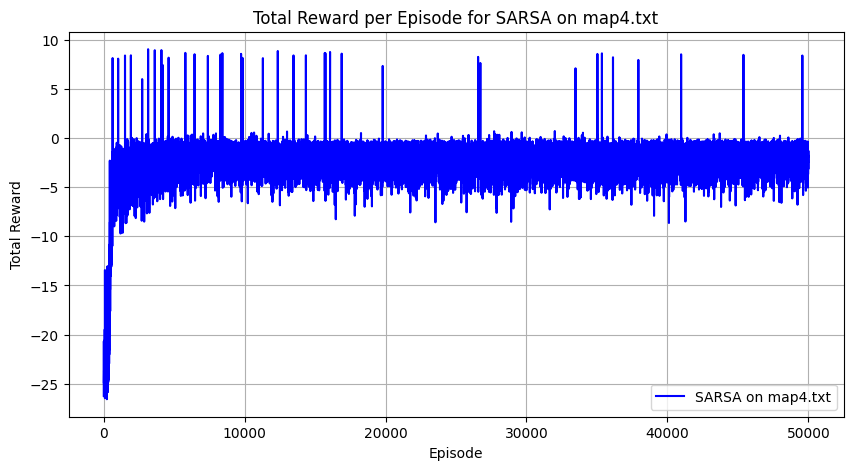

Saved SARSA rewards plot for map4.txt to sarsa_rewards_map4.png


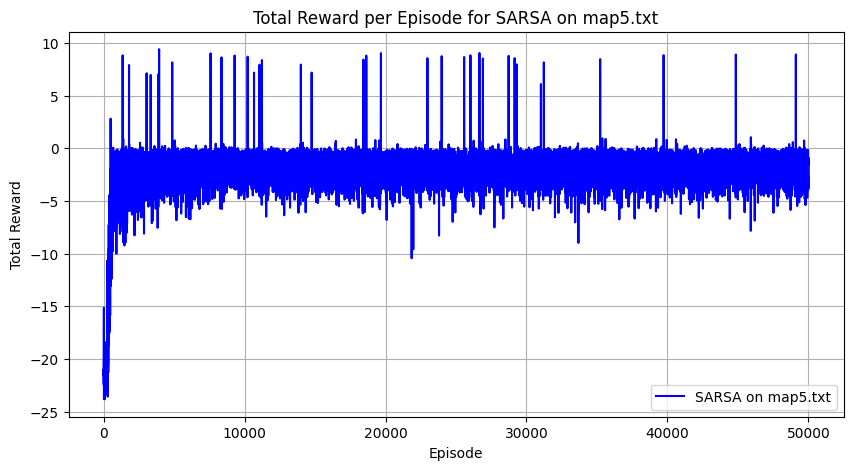

Saved SARSA rewards plot for map5.txt to sarsa_rewards_map5.png


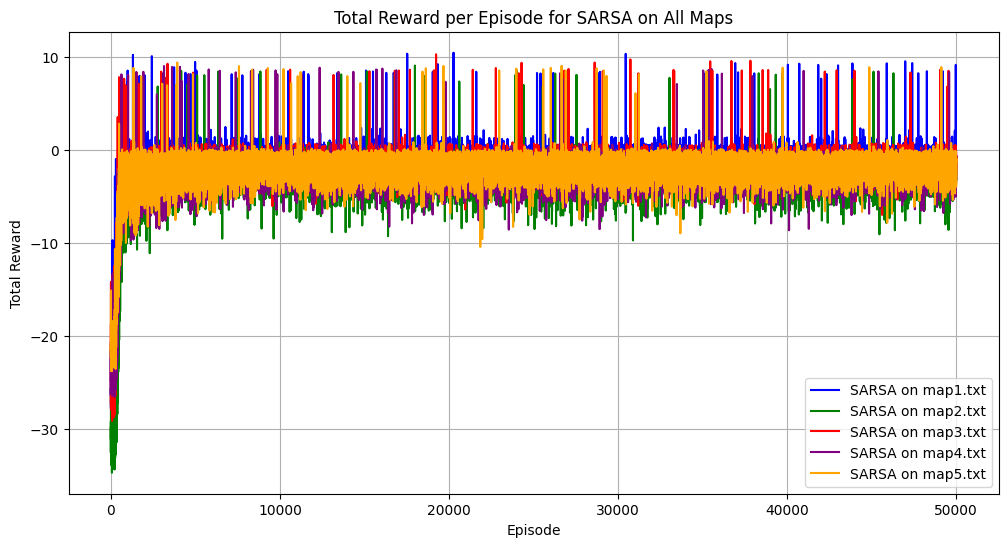

Saved combined SARSA rewards plot to sarsa_training_rewards_all.png


In [17]:
all_rewards = {}

# Huấn luyện trên từng map
for map_file in maps:
    print(f"\nTraining SARSA on {map_file}...")
    rewards = train_on_map(
        map_file=map_file,
        **params
    )
    all_rewards[map_file] = rewards

# Vẽ biểu đồ riêng cho từng map
for map_file, rewards in all_rewards.items():
    plt.figure(figsize=(10, 5))
    plt.plot(rewards, label=f'SARSA on {map_file}', color='blue')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title(f'Total Reward per Episode for SARSA on {map_file}')
    plt.legend()
    plt.grid(True)
    plt.show()
    output_file = f"sarsa_rewards_{map_file.split('.')[0]}.png"
    plt.savefig(output_file)
    print(f"Saved SARSA rewards plot for {map_file} to {output_file}")
    plt.close()

# Vẽ biểu đồ tổng hợp cho tất cả map
plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i, (map_file, rewards) in enumerate(all_rewards.items()):
    plt.plot(rewards, label=f'SARSA on {map_file}', color=colors[i % len(colors)])
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode for SARSA on All Maps')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('sarsa_training_rewards_all.png')
print("Saved combined SARSA rewards plot to sarsa_training_rewards_all.png")
plt.close()